# **Exploratory Data Analysis**

1.	Overview of the Data:
- Understand the structure of the dataset, including the number of rows, columns, and data types.
2.	Summary Statistics
-	Understand the central tendency, dispersion, and shape of the dataset’s distribution.
3.	Distribution of Numerical Features
-	Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.
4.	Distribution of Categorical Features
-	Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.
5.	Correlation Analysis
-	Understanding the relationship between numerical features.
6.	Identifying Missing Values
-	Identify missing values to determine missing data and decide on appropriate imputation strategies.
7.	Outlier Detection
-	Use box plots to identify outliers.


## Import Libraries

In [1]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from eda import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df , df_definitions = load_data()

2024-10-04 18:23:12,734 - INFO - Loading Data ...
2024-10-04 18:23:13,046 - INFO - Loading Data Finshed


## Data Overview

In [3]:
df_definitions

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transactions for processing
2,AccountId,Unique number identifying the customer on platform
3,SubscriptionId,Unique number identifying the customer subscription
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader product categories.


In [4]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [5]:
data_overview(df)

2024-10-04 18:23:13,097 - INFO - Loading Data Overivew


The shape of our Data is (95662, 16)

Data Overview:


,Data Types,Number of missing values,Unique values
CurrencyCode,object,0,1
CountryCode,int64,0,1
FraudResult,int64,0,2
ChannelId,object,0,4
PricingStrategy,int64,0,4
ProviderId,object,0,6
ProductCategory,object,0,9
ProductId,object,0,23
Value,int64,0,1517
Amount,float64,0,1676


Insights 

- There are no missing values in our dataset. It is a cleaned dataset. 

- The only currency on our data os Ugandan Shilling(UGX). 

- Our data is collected from Uganda with 256 country code. 

- **Fraud Result** is our target variable with "0" and "1" as value. 


## Statistics Summary 

In [6]:
summary(df)

2024-10-04 18:23:13,235 - INFO - 


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


Categorical Summary


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


## Unique Features

In [7]:
col = ['FraudResult', 'ChannelId', 'PricingStrategy', 'ProviderId', 'ProductCategory', 'ProductId']

display(uniq(df, col))

2024-10-04 18:23:13,495 - INFO - Unique Values in each columns



2 Unique values of FraudResult [0 1]

4 Unique values of ChannelId ['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']

4 Unique values of PricingStrategy [2 4 1 0]

6 Unique values of ProviderId ['ProviderId_6' 'ProviderId_4' 'ProviderId_1' 'ProviderId_5'
 'ProviderId_3' 'ProviderId_2']

9 Unique values of ProductCategory ['airtime' 'financial_services' 'utility_bill' 'data_bundles' 'tv'
 'transport' 'ticket' 'movies' 'other']

23 Unique values of ProductId ['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']



None

## Distribution of Numerical Features

2024-10-04 18:23:13,548 - INFO -  plotting numerical variables


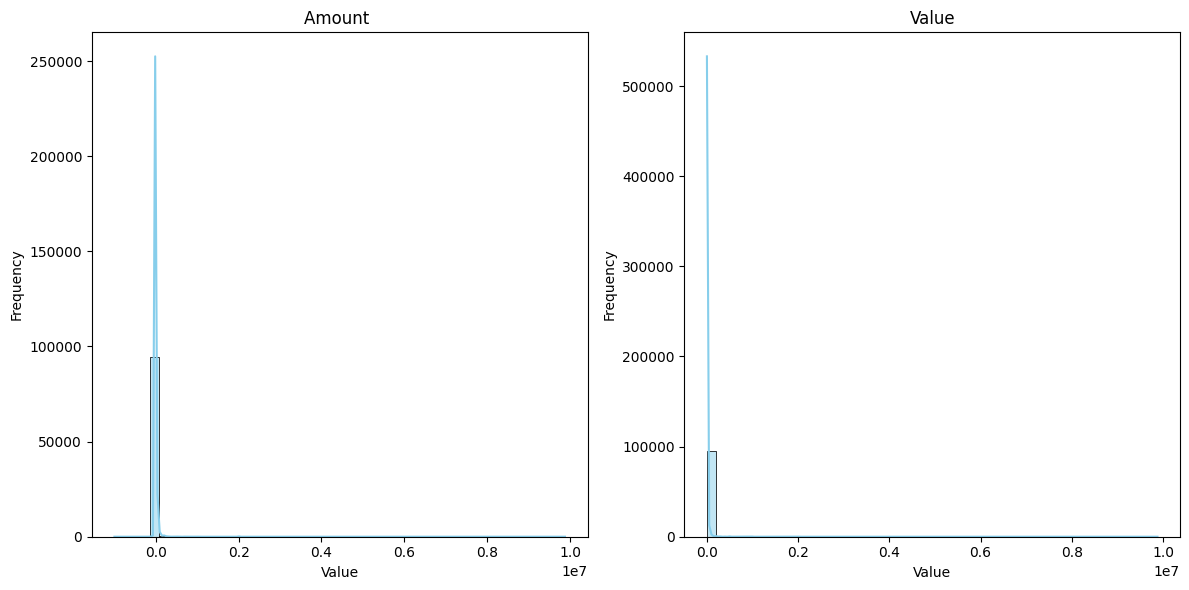

In [8]:
plot_numerical(df)

**Insights**

- Both Amount and Value donot distributed normally but are both are heavily rightly skewed. 
- The amount values enter negative implying it's credited. 
- values take the abolute values of amount so, no negative values is shown 

## Distribution of Categorical Features

- univariant Analysis

2024-10-04 18:23:14,368 - INFO - Plotting Categorical variables


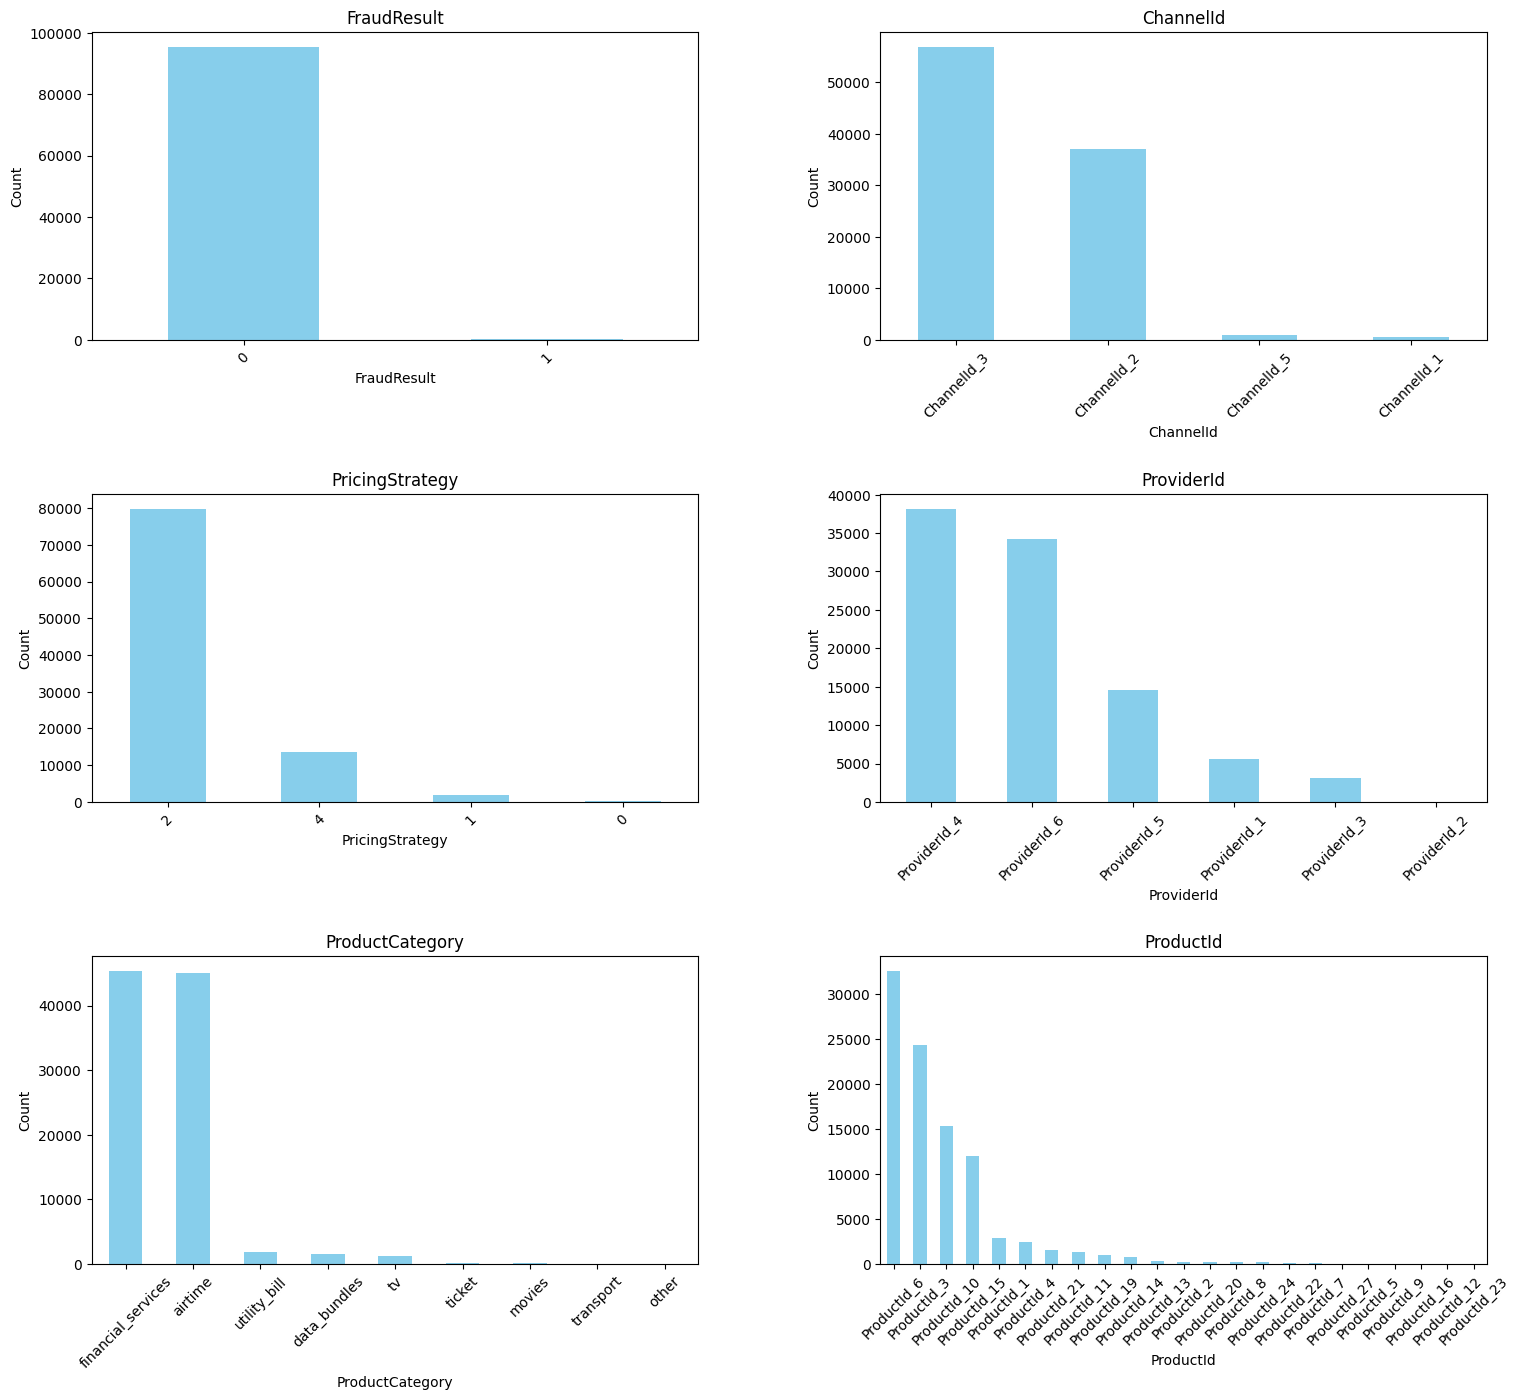

In [9]:
plot_cat(df,col)

## Detecting outliers 

- Detecting outliers in Amount and Value using Boxplot 

2024-10-04 18:23:15,000 - INFO - Plotting outliers using boxplot


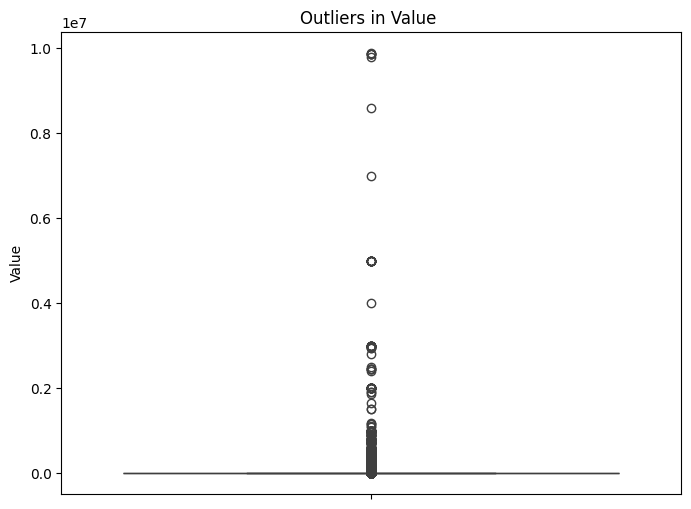

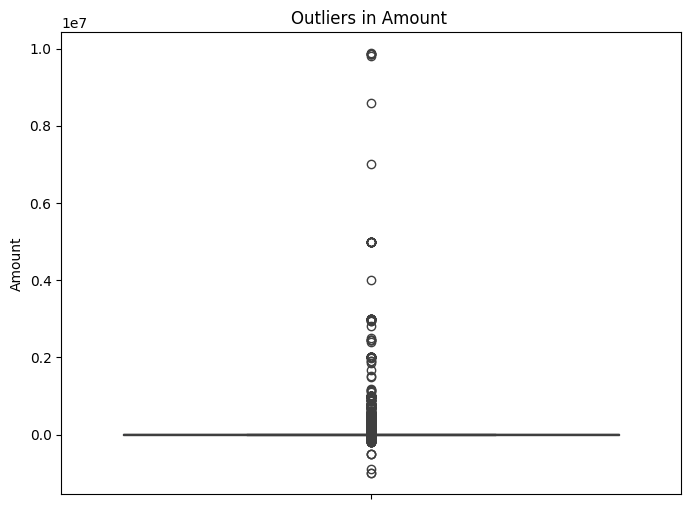

In [10]:
plot_outliers(df)

- Detecting outliers using IQR

In [11]:
numerical = ['Amount', 'Value']
# Check for outliers and print the counts
lower_bounds, upper_bounds, outlier_counts = count_outliers_iqr(df,numerical)

# Print outlier counts for each column
for column, count in outlier_counts.items():
    print(f"Number of outliers in column '{column}': {count}")

2024-10-04 18:23:15,446 - INFO - Detecting Outliers using IQR method


Number of outliers in column 'Amount': 24441
Number of outliers in column 'Value': 9021


## Correlation Analysis

2024-10-04 18:23:15,467 - INFO -  Correlation between numerical features


,Amount,Value,PricingStrategy,FraudResult
Amount,1.000000,0.989692,-0.061931,0.557370
Value,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,0.557370,0.566739,-0.033821,1.000000


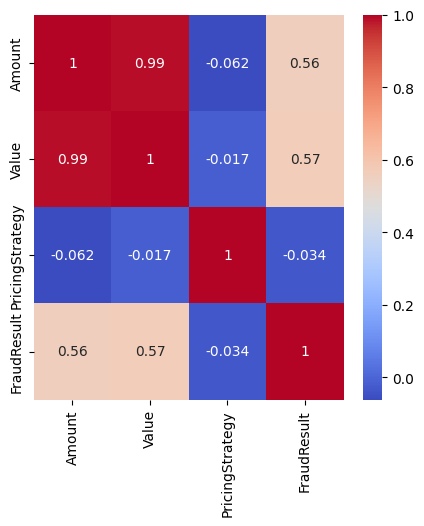

In [12]:
corr(df)

**Insights**
- There is a high correlation between Amount and Value as expected. 
- There is also a positive correlation between both amount and value with Fraud Result. Which means If the amount value of the transcation increases the possibility of Fraud Result being one increased. 

# Additional 

## MultiVariant Analysis

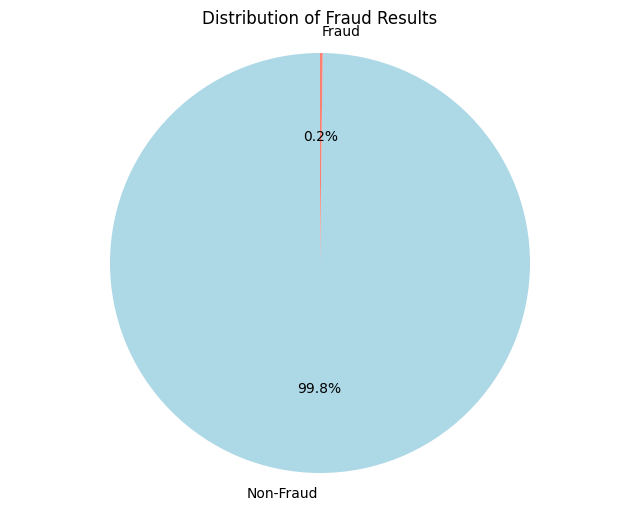

In [13]:
# Count the occurrences of each fraud result
fraud_counts = df['FraudResult'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribution of Fraud Results')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

**Exploring Fraud Results with other Features**

- We have seen Fraud Reslut has a high correlation with Amount and values

- From 95,662 Transactions 193 have default Fraud Result, which is 0.2%
- 99.8% of the transactions have no fraud results

### Amount and Fraud Result

In [14]:
percentiles = df['Amount'].quantile([i / 100 for i in range(101)])
value_at_1st = percentiles[0.01]
filtered_df = df[df['Amount'] <= value_at_1st] 
print('From ', filtered_df[filtered_df['FraudResult'] == 0].shape[0], 'transactions, There are ',  filtered_df[filtered_df['FraudResult'] == 1].shape[0], 'Transactions in one percentile of Amount that have default Fraud Result.','\n')
display(filtered_df[filtered_df['FraudResult'] == 1][[ 'CustomerId','Amount', 'Value','FraudResult']])

From  1224 transactions, There are  4 Transactions in one percentile of Amount that have default Fraud Result. 



,CustomerId,Amount,Value,FraudResult
55822,CustomerId_7339,-900000.0,900000,1
55841,CustomerId_7339,-500000.0,500000,1
56035,CustomerId_7401,-500000.0,500000,1
60834,CustomerId_7429,-500000.0,500000,1


In [15]:
percentiles = df['Amount'].quantile([i / 100 for i in range(101)])
value_at_99th = percentiles[0.99]
filtered_df = df[df['Amount'] >= value_at_99th] 
print('From ', filtered_df[filtered_df['FraudResult'] == 0].shape[0], 'transactions. There are ',  filtered_df[filtered_df['FraudResult'] == 1].shape[0], 'Transactions in above 99 percentile of Amount that have default Fraud Result.','\n')
display(filtered_df[filtered_df['FraudResult'] == 1][[ 'CustomerId','Amount', 'Value','FraudResult']])

From  908 transactions. There are  184 Transactions in above 99 percentile of Amount that have default Fraud Result. 



,CustomerId,Amount,Value,FraudResult
131,CustomerId_4275,700000.0,700000,1
146,CustomerId_7414,725000.0,725000,1
155,CustomerId_4275,700000.0,700000,1
2376,CustomerId_4134,700000.0,700000,1
2452,CustomerId_4275,700000.0,700000,1
...,...,...,...,...
94805,CustomerId_5155,2000000.0,2000000,1
95108,CustomerId_2303,500000.0,500000,1
95262,CustomerId_2303,500000.0,500000,1
95264,CustomerId_2303,500000.0,500000,1


In [16]:
percentiles = df['Value'].quantile([i / 100 for i in range(101)])
value_at_99th = percentiles[0.99]
filtered_df = df[df['Value'] >= value_at_99th] 
filtered_df[filtered_df['FraudResult'] == 1][[ 'CustomerId','Amount', 'Value','FraudResult']]

,CustomerId,Amount,Value,FraudResult
131,CustomerId_4275,700000.0,700000,1
146,CustomerId_7414,725000.0,725000,1
155,CustomerId_4275,700000.0,700000,1
2376,CustomerId_4134,700000.0,700000,1
2452,CustomerId_4275,700000.0,700000,1
...,...,...,...,...
94805,CustomerId_5155,2000000.0,2000000,1
95108,CustomerId_2303,500000.0,500000,1
95262,CustomerId_2303,500000.0,500000,1
95264,CustomerId_2303,500000.0,500000,1


In [17]:
df[df['FraudResult'] == 1].shape

(193, 16)

In [18]:
df[df['FraudResult'] == 1]['CustomerId'].nunique()

54

In [19]:
df[df['FraudResult'] == 1]['CustomerId'].unique()

array(['CustomerId_4275', 'CustomerId_7414', 'CustomerId_4134',
       'CustomerId_2353', 'CustomerId_4453', 'CustomerId_4391',
       'CustomerId_5054', 'CustomerId_1858', 'CustomerId_2214',
       'CustomerId_4878', 'CustomerId_1122', 'CustomerId_5105',
       'CustomerId_2266', 'CustomerId_698', 'CustomerId_2143',
       'CustomerId_2216', 'CustomerId_806', 'CustomerId_3467',
       'CustomerId_5123', 'CustomerId_4128', 'CustomerId_2528',
       'CustomerId_3768', 'CustomerId_1891', 'CustomerId_2292',
       'CustomerId_4075', 'CustomerId_1680', 'CustomerId_2703',
       'CustomerId_3956', 'CustomerId_2877', 'CustomerId_1302',
       'CustomerId_1984', 'CustomerId_7339', 'CustomerId_4925',
       'CustomerId_7401', 'CustomerId_7429', 'CustomerId_2445',
       'CustomerId_856', 'CustomerId_1653', 'CustomerId_1567',
       'CustomerId_1698', 'CustomerId_1850', 'CustomerId_865',
       'CustomerId_1988', 'CustomerId_2656', 'CustomerId_1175',
       'CustomerId_909', 'CustomerId_1602', 

**Insights**
- From 95,662 Transaction only 193 transactions are default. 
- From these 193 default transactions 188 transactions are by customers where the value of  

In [20]:
df[df['FraudResult'] == 1].sort_values(by='Amount').head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
55822,TransactionId_56954,BatchId_76447,AccountId_4249,SubscriptionId_4429,CustomerId_7339,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-900000.0,900000,2019-01-10T15:48:59Z,4,1
60834,TransactionId_126320,BatchId_93368,AccountId_4249,SubscriptionId_4429,CustomerId_7429,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.0,500000,2019-01-15T11:09:57Z,0,1
56035,TransactionId_87682,BatchId_101919,AccountId_4249,SubscriptionId_4429,CustomerId_7401,UGX,256,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.0,500000,2019-01-10T21:27:12Z,4,1
55841,TransactionId_73797,BatchId_127642,AccountId_4249,SubscriptionId_4429,CustomerId_7339,UGX,256,ProviderId_4,ProductId_10,airtime,ChannelId_2,-500000.0,500000,2019-01-10T16:03:35Z,4,1
68918,TransactionId_71725,BatchId_62457,AccountId_4841,SubscriptionId_3829,CustomerId_865,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1005.0,1005,2019-01-23T09:15:37Z,2,1
68888,TransactionId_11592,BatchId_62469,AccountId_530,SubscriptionId_135,CustomerId_865,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,500.0,500,2019-01-23T08:55:16Z,2,1
71689,TransactionId_52301,BatchId_76054,AccountId_1609,SubscriptionId_2872,CustomerId_1988,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,30000.0,30000,2019-01-25T10:24:10Z,2,1
70492,TransactionId_78946,BatchId_13641,AccountId_1609,SubscriptionId_2872,CustomerId_1988,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,50000.0,50000,2019-01-24T21:02:07Z,2,1
69570,TransactionId_63916,BatchId_36626,AccountId_1609,SubscriptionId_2872,CustomerId_1988,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,50000.0,50000,2019-01-23T20:49:20Z,2,1
70529,TransactionId_47115,BatchId_115311,AccountId_1609,SubscriptionId_2872,CustomerId_1988,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,100000.0,100000,2019-01-24T21:42:23Z,2,1


In [21]:
df[df['FraudResult'] == 1].sort_values(by='Value').tail(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
82891,TransactionId_83769,BatchId_40333,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,5000000.0,5000000,2019-02-02T03:14:08Z,2,1
24529,TransactionId_95764,BatchId_2365,AccountId_1873,SubscriptionId_2964,CustomerId_2266,UGX,256,ProviderId_3,ProductId_15,financial_services,ChannelId_3,5000000.0,5000000,2018-12-12T21:11:25Z,0,1
82314,TransactionId_7569,BatchId_123441,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,7000000.0,7000000,2019-02-01T17:23:59Z,2,1
65304,TransactionId_25959,BatchId_41544,AccountId_2043,SubscriptionId_842,CustomerId_2445,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,8600000.0,8600000,2019-01-19T07:23:31Z,2,1
93004,TransactionId_96894,BatchId_48649,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9800000.0,9800000,2019-02-11T03:31:21Z,2,1
93003,TransactionId_137519,BatchId_61860,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9850000.0,9850000,2019-02-11T03:26:13Z,2,1
87466,TransactionId_55014,BatchId_130638,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9856000.0,9856000,2019-02-06T21:58:05Z,2,1
92152,TransactionId_15293,BatchId_68761,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9860888.0,9860888,2019-02-10T05:11:25Z,2,1
87465,TransactionId_27985,BatchId_15818,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9870000.0,9870000,2019-02-06T21:49:57Z,2,1
87487,TransactionId_31461,BatchId_56005,AccountId_1178,SubscriptionId_2288,CustomerId_1535,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9880000.0,9880000,2019-02-07T03:45:05Z,2,1


In [22]:
df[df['CustomerId'] == 'CustomerId_909']

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
76569,TransactionId_135363,BatchId_27780,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,95000.0,95000,2019-01-28T17:28:02Z,2,0
76662,TransactionId_103109,BatchId_90376,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,1900000.0,1900000,2019-01-28T18:28:42Z,2,1
76667,TransactionId_16361,BatchId_10711,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2450000.0,2450000,2019-01-28T18:32:24Z,2,1
76693,TransactionId_135392,BatchId_17770,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2400000.0,2400000,2019-01-28T18:56:37Z,2,0
77481,TransactionId_110741,BatchId_17467,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,80000.0,80000,2019-01-29T15:54:52Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82341,TransactionId_68589,BatchId_125935,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,3000000.0,3000000,2019-02-01T17:29:20Z,0,1
82891,TransactionId_83769,BatchId_40333,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,5000000.0,5000000,2019-02-02T03:14:08Z,2,1
82892,TransactionId_49929,BatchId_134443,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,3000000.0,3000000,2019-02-02T03:14:58Z,2,1
82893,TransactionId_41259,BatchId_29896,AccountId_572,SubscriptionId_2950,CustomerId_909,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,5000000.0,5000000,2019-02-02T03:19:05Z,2,1


In [23]:
fraud_counts = df[df['FraudResult'] == 1].sort_values(by='Value')['CustomerId'].value_counts()

# Filter to get only customers with exactly one fraud result
customers_with_one_fraud = fraud_counts[fraud_counts == 1]

# Get the list of CustomerIds
customer_list = customers_with_one_fraud.index.tolist()

# Display the list of customers
print('Customers with only 1 Fraud Result Record:',customer_list)


Customers with only 1 Fraud Result Record: ['CustomerId_7416', 'CustomerId_806', 'CustomerId_682', 'CustomerId_1122', 'CustomerId_1850', 'CustomerId_1653', 'CustomerId_4128', 'CustomerId_1602', 'CustomerId_3956', 'CustomerId_1891', 'CustomerId_2292', 'CustomerId_5123', 'CustomerId_4134', 'CustomerId_2656', 'CustomerId_2214', 'CustomerId_3467', 'CustomerId_4075', 'CustomerId_1984', 'CustomerId_1698', 'CustomerId_7429', 'CustomerId_2528', 'CustomerId_7401', 'CustomerId_2143', 'CustomerId_1680', 'CustomerId_698', 'CustomerId_2703', 'CustomerId_2877', 'CustomerId_5105']


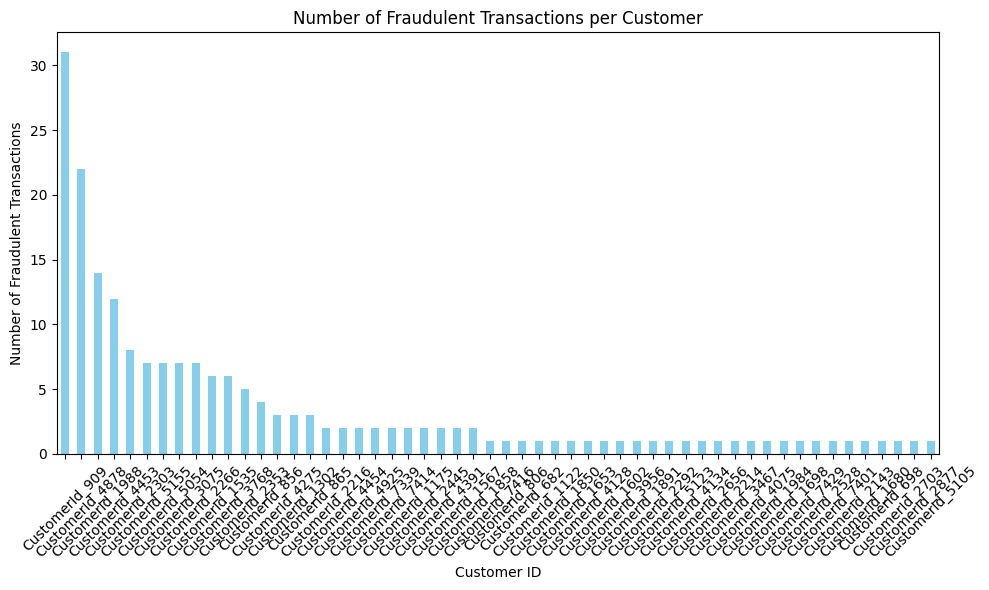

In [24]:
# Plotting the fraud counts
plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Number of Fraudulent Transactions per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Fraudulent Transactions')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Customers with default with their count
fraud = df[df['FraudResult'] == 1]['CustomerId'].nunique()
fraud_counts = df[df['FraudResult'] == 1].sort_values(by='Value')['CustomerId'].value_counts()

# Number of customers with Fraud results
print(f'Unique customer number in Default Fraud Results : {fraud}\n')

# Create a dictionary to store customer lists for each fraud count
customer_lists = {}

# Loop through counts from 1 to 8
for count in range(1, 9):
    # Get customers with exactly 'count' frauds
    customers = fraud_counts[fraud_counts == count].index.tolist()
    if customers:
        customer_lists[count] = customers

# Display the results
for count, customers in customer_lists.items():
    num_customers = len(customers)
    print(f"Customers with {count} fraud result are {num_customers} in number. These are:\n {', '.join(customers)}\n")

# Top 5 Customers
print('Top 5 customers with most Default transcations')
display(df[df['FraudResult'] == 1].sort_values(by='Value')['CustomerId'].value_counts().head())


Unique customer number in Default Fraud Results : 54

Customers with 1 fraud result are 28 in number. These are:
 CustomerId_7416, CustomerId_806, CustomerId_682, CustomerId_1122, CustomerId_1850, CustomerId_1653, CustomerId_4128, CustomerId_1602, CustomerId_3956, CustomerId_1891, CustomerId_2292, CustomerId_5123, CustomerId_4134, CustomerId_2656, CustomerId_2214, CustomerId_3467, CustomerId_4075, CustomerId_1984, CustomerId_1698, CustomerId_7429, CustomerId_2528, CustomerId_7401, CustomerId_2143, CustomerId_1680, CustomerId_698, CustomerId_2703, CustomerId_2877, CustomerId_5105

Customers with 2 fraud result are 10 in number. These are:
 CustomerId_2216, CustomerId_4454, CustomerId_4925, CustomerId_7339, CustomerId_7414, CustomerId_1175, CustomerId_2445, CustomerId_4391, CustomerId_1567, CustomerId_1858

Customers with 3 fraud result are 3 in number. These are:
 CustomerId_4275, CustomerId_1302, CustomerId_865

Customers with 4 fraud result are 1 in number. These are:
 CustomerId_856


CustomerId
CustomerId_909     31
CustomerId_4878    22
CustomerId_1988    14
CustomerId_4453    12
CustomerId_2303     8
Name: count, dtype: int64

In [26]:
df[['Value','Amount']].describe()

,Value,Amount
count,9.566200e+04,9.566200e+04
mean,9.900584e+03,6.717846e+03
std,1.231221e+05,1.233068e+05
min,2.000000e+00,-1.000000e+06
25%,2.750000e+02,-5.000000e+01
50%,1.000000e+03,1.000000e+03
75%,5.000000e+03,2.800000e+03
max,9.880000e+06,9.880000e+06


2024-10-04 18:23:16,379 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-04 18:23:16,443 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


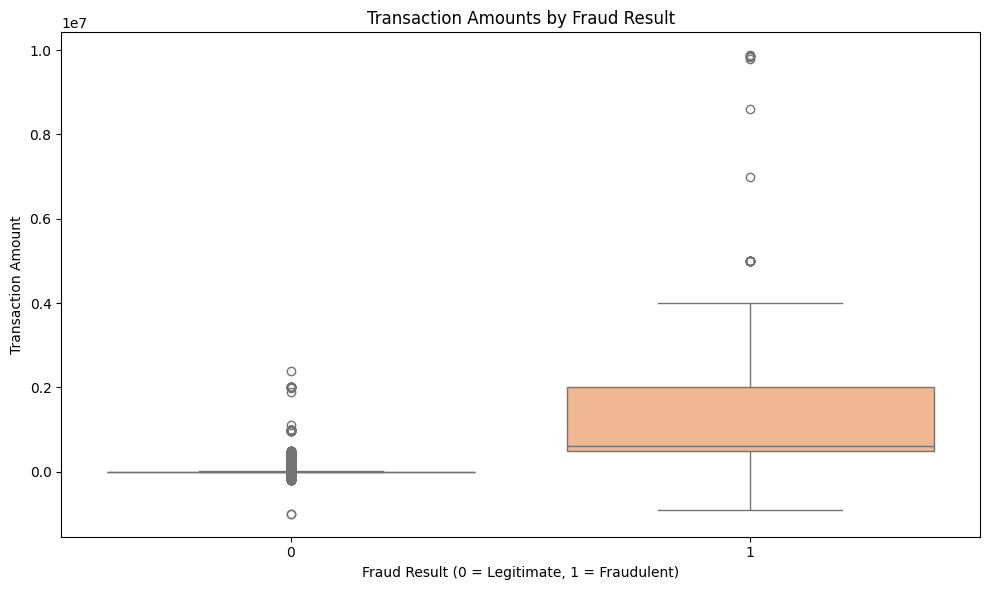

In [27]:
# Create a box plot to visualize the distribution of amounts by fraud result
plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudResult', y='Amount', data=df, palette='pastel')

# Adding titles and labels
plt.title('Transaction Amounts by Fraud Result')
plt.xlabel('Fraud Result (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Transaction Amount')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
print(f'Minimum value where transaction is legitimate:{df[df['FraudResult'] == 0]['Amount'].min()}\n Maximum value: {df[df['FraudResult'] == 0]['Amount'].max()}\n')
print(f'Minimum value where transaction is Default:{df[df['FraudResult'] == 1]['Amount'].min()}\n Maximum value: {df[df['FraudResult'] == 1]['Amount'].max()}\n')

Minimum value where transaction is legitimate:-1000000.0
 Maximum value: 2400000.0

Minimum value where transaction is Default:-900000.0
 Maximum value: 9880000.0



2024-10-04 18:23:16,716 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-04 18:23:16,763 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


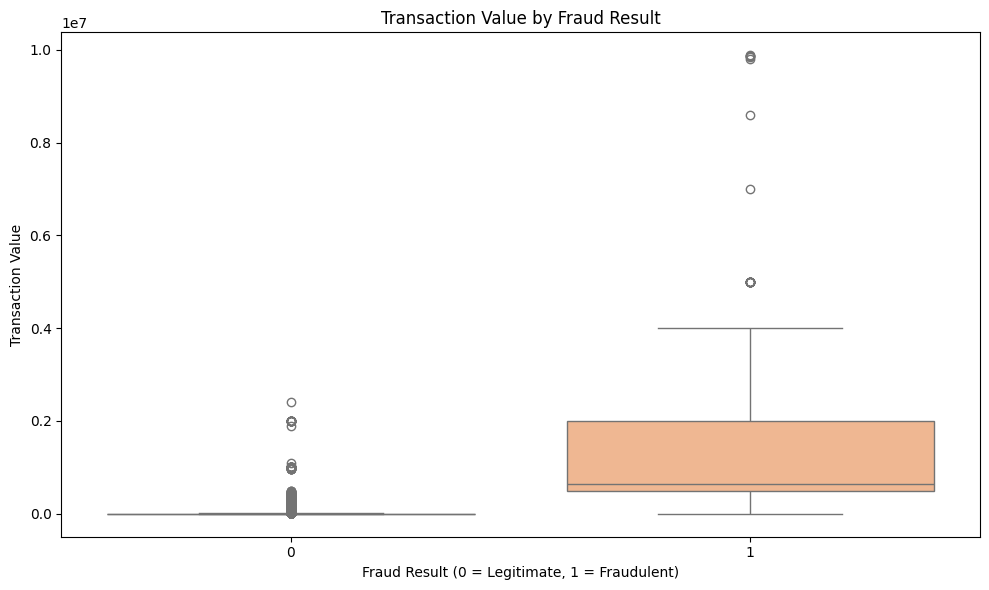

In [29]:
# Create a box plot to visualize the distribution of amounts by fraud result
plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudResult', y='Value', data=df, palette='pastel')

# Adding titles and labels
plt.title('Transaction Value by Fraud Result')
plt.xlabel('Fraud Result (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Transaction Value')

# Show the plot
plt.tight_layout()
plt.show()